In [0]:
%pip install pycaret -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow-skinny 2.11.4 requires protobuf<5,>=3.12.0, but you have protobuf 5.29.3 which is incompatible.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
# %restart_python

In [0]:
import pycaret
import pandas as pd

In [0]:
sfOptions = {
  "sfURL": f"{dbutils.secrets.get(scope='snowflake', key='sfAccount')}.snowflakecomputing.com",
  "sfUser": dbutils.secrets.get(scope="snowflake", key="sfUser"),
  "sfPassword": dbutils.secrets.get(scope="snowflake", key="sfPassword"),
  "sfDatabase": dbutils.secrets.get(scope="snowflake", key="sfDatabase"),
  "sfSchema": dbutils.secrets.get(scope="snowflake", key="sfSchema"),
  "sfWarehouse": dbutils.secrets.get(scope="snowflake", key="sfWarehouse")
}

df = spark.read \
  .format("snowflake") \
  .options(**sfOptions) \
  .option("dbtable", "TAXI_VIEW") \
  .load()


In [0]:
from pyspark.sql.functions import log, col

# df = df.withColumn(
#     # "Gap Ratio - Logarithm",
#     # log(col("PICKUP_CNT") / col("DROPOFF_CNT"))
# )

df.dropna()
pu_do_df = df.toPandas()
numeric_cols = [
    'PICKUP_CNT', 'DROPOFF_CNT', 'EVENT_COUNT', 'FOG_FLAG', 'RAIN_FLAG',
    'SNOW_FLAG', 'TEMP_MAX', 'THUNDER_FLAG', 'CRASH_COUNT',
    'CONSTRUCTION_CNT'
]
pu_do_df[numeric_cols] = pu_do_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [0]:
from pycaret.regression import setup, create_model, save_model, plot_model, load_model, create_app, compare_models

setup(pu_do_df, target='PICKUP_CNT')
best_model = compare_models(exclude=['xgboost', 'catboost', 'mlp', 'svm'])

,Description,Value
0,Session id,2727
1,Target,PICKUP_CNT
2,Target type,Regression
3,Original data shape,"(84926, 16)"
4,Transformed data shape,"(84926, 23)"
5,Transformed train set shape,"(59448, 23)"
6,Transformed test set shape,"(25478, 23)"
7,Numeric features,12
8,Categorical features,3
9,Rows with missing values,2.1%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,36.4286,1.138454e+04,106.6008,0.9905,0.3454,0.3763,23.416
rf,Random Forest Regressor,37.1308,1.209165e+04,109.8814,0.9900,0.3433,0.3751,38.945
lightgbm,Light Gradient Boosting Machine,40.6038,1.205265e+04,109.7448,0.9900,0.5197,0.8672,2.937
knn,K Neighbors Regressor,45.3776,1.750627e+04,132.2600,0.9854,0.4948,0.8222,2.638
gbr,Gradient Boosting Regressor,51.0538,1.867460e+04,136.5522,0.9845,0.6624,1.4426,8.341
dt,Decision Tree Regressor,50.0635,2.235571e+04,149.4026,0.9814,0.4687,0.4670,0.835
lr,Linear Regression,107.6865,5.192811e+04,227.7690,0.9569,1.5199,8.5850,0.965
ridge,Ridge Regression,107.6822,5.192813e+04,227.7690,0.9569,1.5199,8.5841,0.351
lar,Least Angle Regression,108.0090,5.194133e+04,227.7988,0.9569,1.5245,8.6478,0.434
br,Bayesian Ridge,107.6432,5.192863e+04,227.7701,0.9569,1.5192,8.5756,0.435


In [0]:
from pycaret.regression import setup, create_model, save_model, plot_model, load_model, create_app, compare_models


In [0]:
setup(pu_do_df, target='PICKUP_CNT')
pu_do_rfr = create_model('rf')


,Description,Value
0,Session id,7551
1,Target,PICKUP_CNT
2,Target type,Regression
3,Original data shape,"(84926, 16)"
4,Transformed data shape,"(84926, 23)"
5,Transformed train set shape,"(59448, 23)"
6,Transformed test set shape,"(25478, 23)"
7,Numeric features,12
8,Categorical features,3
9,Rows with missing values,2.1%


''

Processing:  50%|█████     | 2/4 [00:19<00:00, 12.74it/s]

In [0]:
save_model(pu_do_rfr, 'pu_do_rfr_model')

In [0]:
plot_model(pu_do_rfr, plot="feature")

In [0]:
from prophet import Prophet
import pandas as pd
import numpy as np

forecast_results = []
pu_models = {}
for zone in pu_do_df['TAXI_ZONE'].unique():
    zone_df = pu_do_df[
        pu_do_df['TAXI_ZONE'] == zone
    ][
        ['DATE', 'PICKUP_CNT']
    ].rename(
        columns={
            'DATE': 'ds',
            'PICKUP_CNT': 'y'
        }
    ).sort_values('ds')

    if len(zone_df) >= 2:
        pu_model = Prophet()
        pu_model.add_country_holidays("US")
        pu_model.fit(zone_df)
        future = pu_model.make_future_dataframe(periods=30)

        forecast = pu_model.predict(future)
        forecast['yhat'] = forecast['yhat'].clip(lower=0)

        pu_models[zone] = pu_model
        forecast['TAXI_ZONE'] = zone
        forecast_results.append(
            forecast
        )
    else:
        print(f"Skipping zone {zone}: not enough data points.")

14:11:02 - cmdstanpy - INFO - Chain [1] start processing
14:11:02 - cmdstanpy - INFO - Chain [1] done processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] done processing
14:11:04 - cmdstanpy - INFO - Chain [1] start processing
14:11:04 - cmdstanpy - INFO - Chain [1] done processing
14:11:04 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:06 - cmdstanpy - INFO - Chain [1] start processing
14:11:06 - cmdstanpy - INFO - Chain [1] done processing
14:11:06 - cmdstanpy - INFO - Chain [1] start processing
14:11:06 - cmdstanpy - INFO - Chain [1] done processing
14:11:07 - cmdstanpy - INFO - Chain [1] start processing
14:11:07 - cmdstanpy - INFO - Chain [1] done processing
14:11:07 - cmdstanpy - INFO - Chain [1] start processing
14:11:07 - cmdstanpy - INFO - Chain [1]

Skipping zone 105: not enough data points.


14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - INFO - Chain [1] start processing
14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] done processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] start processing
14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing


In [0]:
forecast_results[66]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Juneteenth National Independence Day,Juneteenth National Independence Day_lower,Juneteenth National Independence Day_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,Thanksgiving Day,Thanksgiving Day_lower,Thanksgiving Day_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,TAXI_ZONE
0,2024-01-01,1547.695916,763.666855,1329.525175,1547.695916,1547.695916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-320.404968,-320.404968,-320.404968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-509.939478,-509.939478,-509.939478,-320.404968,-320.404968,-320.404968,-189.534510,-189.534510,-189.534510,0.0,0.0,0.0,1037.756438,43
1,2024-01-02,1550.009191,1280.199944,1812.835364,1550.009191,1550.009191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.273889,-16.273889,-16.273889,0.000000,0.000000,0.000000,-16.273889,-16.273889,-16.273889,0.0,0.0,0.0,1533.735302,43
2,2024-01-03,1552.322466,1142.127256,1699.911870,1552.322466,1552.322466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-134.347639,-134.347639,-134.347639,0.000000,0.000000,0.000000,-134.347639,-134.347639,-134.347639,0.0,0.0,0.0,1417.974827,43
3,2024-01-04,1554.635741,1469.341734,1995.477415,1554.635741,1554.635741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.005444,172.005444,172.005444,0.000000,0.000000,0.000000,172.005444,172.005444,172.005444,0.0,0.0,0.0,1726.641185,43
4,2024-01-05,1556.949017,1471.831661,2002.184913,1556.949017,1556.949017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.583264,183.583264,183.583264,0.000000,0.000000,0.000000,183.583264,183.583264,183.583264,0.0,0.0,0.0,1740.532281,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2025-01-26,2126.224600,1588.486811,2155.054900,2116.166208,2136.454587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-273.243855,-273.243855,-273.243855,0.000000,0.000000,0.000000,-273.243855,-273.243855,-273.243855,0.0,0.0,0.0,1852.980745,43
386,2025-01-27,2129.167287,1674.925701,2218.169253,2118.345016,2140.334274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-189.534510,-189.534510,-189.534510,0.000000,0.000000,0.000000,-189.534510,-189.534510,-189.534510,0.0,0.0,0.0,1939.632777,43
387,2025-01-28,2132.109973,1843.245204,2384.670050,2120.465237,2144.270003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.273889,-16.273889,-16.273889,0.000000,0.000000,0.000000,-16.273889,-16.273889,-16.273889,0.0,0.0,0.0,2115.836084,43
388,2025-01-29,2

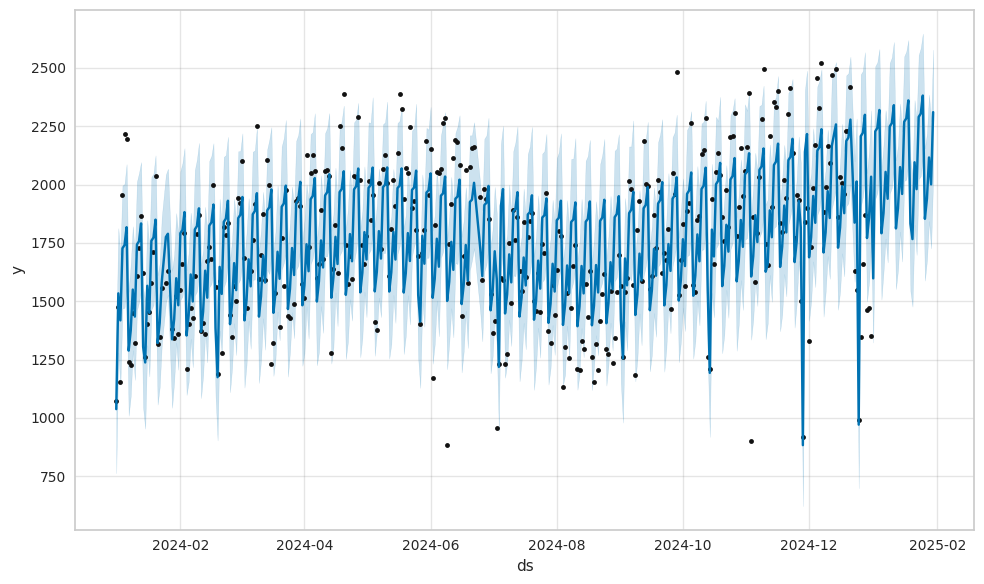

In [0]:
pu_models[43].plot(forecast_results[66]);

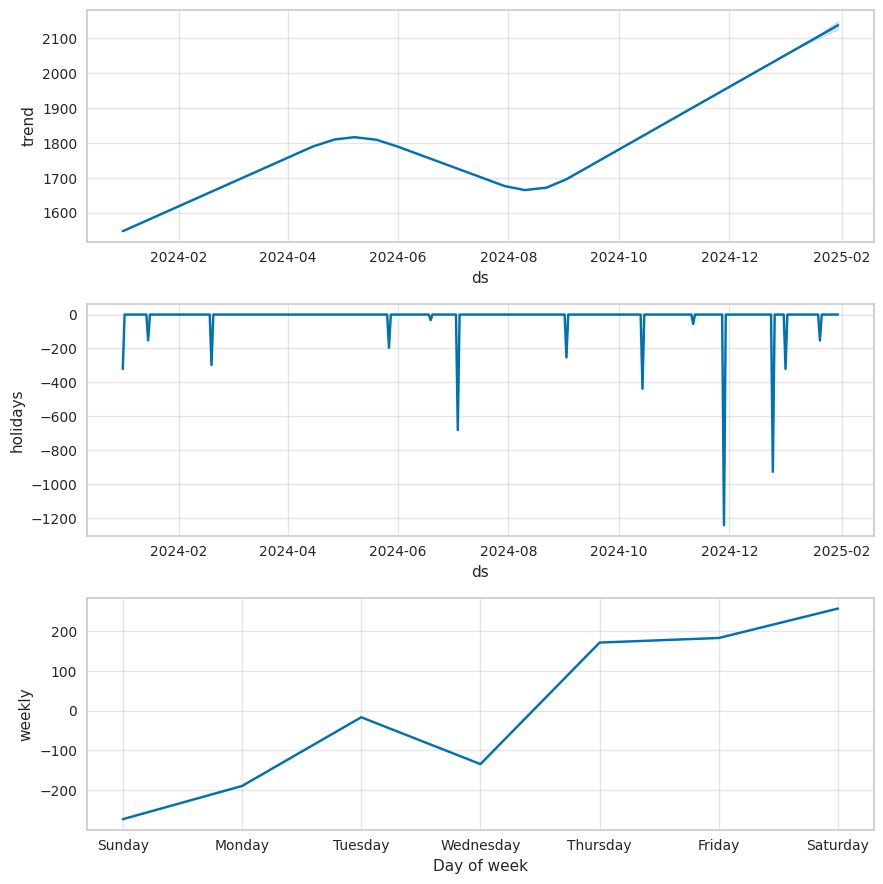

In [0]:
pu_models[43].plot_components(forecast_results[66]);

In [0]:
df_nulls = pd.concat(
    [pu_do_df.isnull().sum(), pu_do_df.eq('').sum()],
    keys=['Nulls', 'Empty'],
    axis=1)
pu_do_df = pu_do_df.dropna()

,Nulls,Empty
DATE,0,0
TAXI_ZONE,0,0
PICKUP_CNT,0,0
DROPOFF_CNT,0,0
BOROUGH,0,0
EVENT_COUNT,0,0
AVG_WINDSPEED,0,0
FOG_FLAG,0,0
PRECIPITATION,0,0
RAIN_FLAG,0,0


In [0]:
from prophet import Prophet
import pandas as pd
import numpy as np

do_forecast_results = []
do_models = {}
for zone in pu_do_df['TAXI_ZONE'].unique():
    zone_df = pu_do_df[
        pu_do_df['TAXI_ZONE'] == zone
    ][
        ['DATE', 'DROPOFF_CNT']
    ].rename(
        columns={
            'DATE': 'ds',
            'DROPOFF_CNT': 'y'
        }
    ).sort_values('ds')

    if len(zone_df) >= 2:
        do_model = Prophet()
        do_model.add_country_holidays("US")
        do_model.fit(zone_df)
        future = do_model.make_future_dataframe(periods=30)
        forecast = do_model.predict(future)
        forecast['yhat'] = forecast['yhat'].clip(lower=0)
        do_models[zone] = do_model
        forecast['TAXI_ZONE'] = zone
        do_forecast_results.append(
            forecast
        )
    else:
        print(f"Skipping zone {zone}: not enough data points.")

14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:58 - cmdstanpy - INFO - Chain [1] done processing
14:13:58 - cmdstanpy - INFO - Chain [1] start processing
14:13:58 - cmdstanpy - INFO - Chain [1] done processing
14:13:59 - cmdstanpy - INFO - Chain [1] start processing
14:13:59 - cmdstanpy - INFO - Chain [1] done processing
14:13:59 - cmdstanpy - INFO - Chain [1] start processing
14:13:59 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:01 - cmdstanpy - INFO - Chain [1] start processing
14:14:01 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1]

Skipping zone 105: not enough data points.


14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:21 - cmdstanpy - INFO - Chain [1] done processing
14:16:21 - cmdstanpy - INFO - Chain [1] start processing
14:16:21 - cmdstanpy - INFO - Chain [1] done processing
14:16:21 - cmdstanpy - INFO - Chain [1] start processing
14:16:21 - cmdstanpy - INFO - Chain [1] done processing


In [0]:
do_forecast_results

[            ds        trend  ...         yhat  TAXI_ZONE
 0   2024-01-01  4805.176000  ...  2252.116035        236
 1   2024-01-02  4806.825512  ...  5362.678652        236
 2   2024-01-03  4808.475024  ...  5613.409914        236
 3   2024-01-04  4810.124536  ...  5758.964552        236
 4   2024-01-05  4811.774049  ...  4878.704876        236
 ..         ...          ...  ...          ...        ...
 385 2025-01-26  6173.631261  ...  4736.962262        236
 386 2025-01-27  6184.621714  ...  6114.903748        236
 387 2025-01-28  6195.612166  ...  6751.465306        236
 388 2025-01-29  6206.602619  ...  7011.537508        236
 389 2025-01-30  6217.593072  ...  7166.433088        236
 
 [390 rows x 53 columns],
             ds        trend  ...         yhat  TAXI_ZONE
 0   2024-01-01  4331.796852  ...  1884.965377        237
 1   2024-01-02  4335.632146  ...  4932.698226        237
 2   2024-01-03  4339.467440  ...  5214.264067        237
 3   2024-01-04  4343.302734  ...  5311.2178

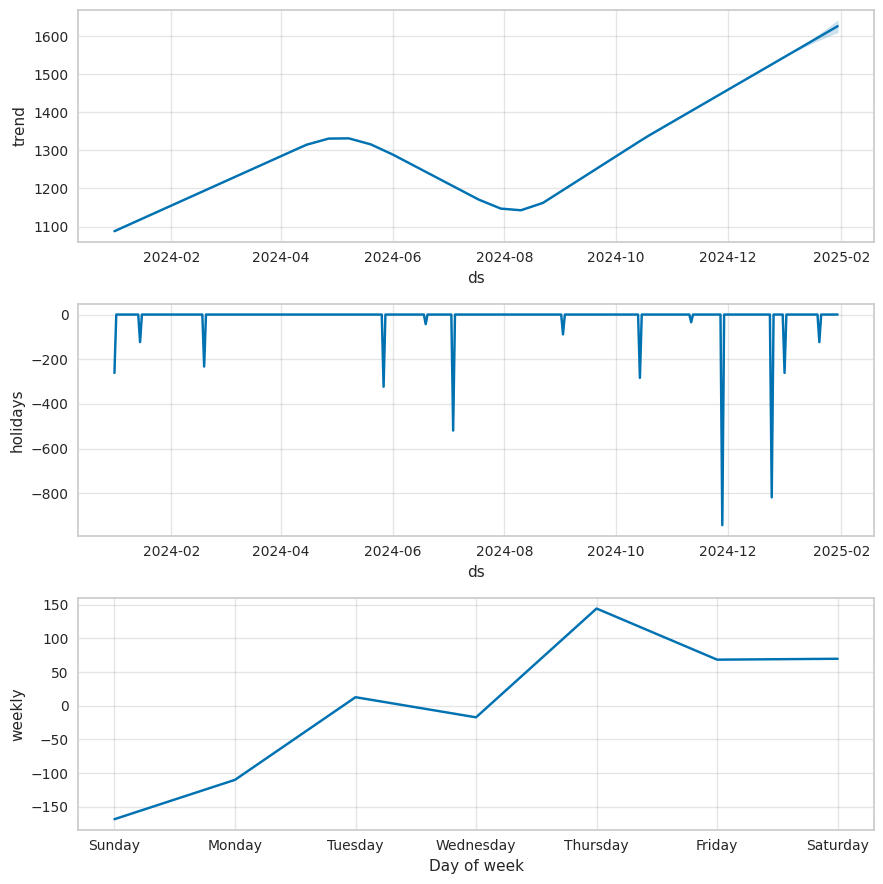

In [0]:
do_models[43].plot_components(do_forecast_results[66]);

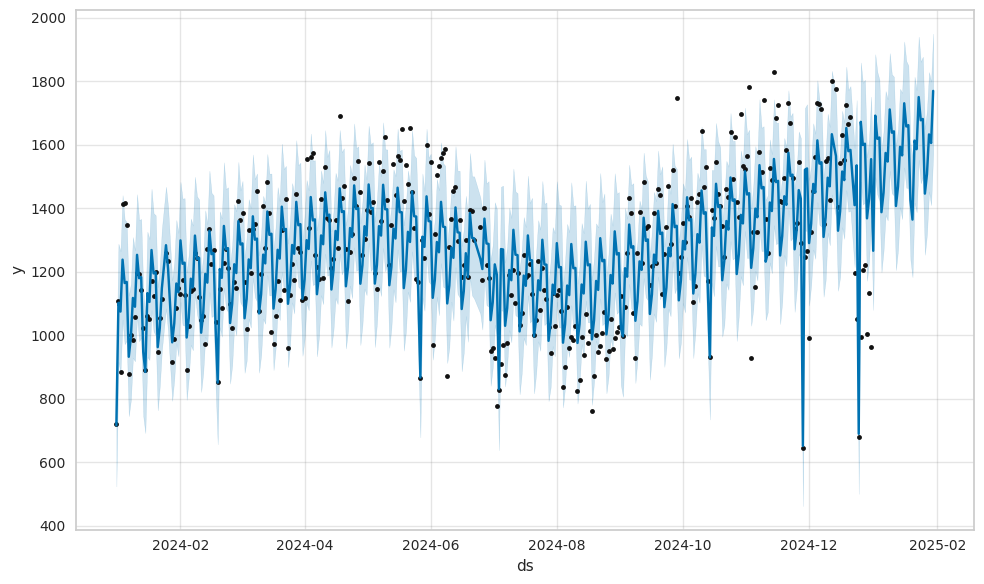

In [0]:
do_models[43].plot(do_forecast_results[66]);

In [0]:
pu_combined_forecast = pd.concat(forecast_results).loc[:,['ds', 'yhat', "TAXI_ZONE"]]
do_combined_forecast = pd.concat(do_forecast_results).loc[:,['ds', 'yhat', "TAXI_ZONE"]]

In [0]:
pu_combined_forecast.to_csv("pu_forecast.csv")
do_combined_forecast.to_csv("do_forecast.csv")

In [0]:
from pyspark.sql.functions import log, col

df = df.withColumn(
    "Gap Ratio - Logarithm",
    log(col("PICKUP_CNT") / col("DROPOFF_CNT"))
)
display(df)

In [0]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[DATE: date, TAXI_ZONE: decimal(38,0), PICKUP_CNT: decimal(30,0), DROPOFF_CNT: decimal(30,0), BOROUGH: string, EVENT_COUNT: decimal(30,0), AVG_WINDSPEED: double, FOG_FLAG: decimal(38,0), PRECIPITATION: double, RAIN_FLAG: decimal(1,0), SNOWFALL: double, SNOW_FLAG: decimal(1,0), TEMP_MAX: decimal(38,0), THUNDER_FLAG: decimal(38,0), CRASH_COUNT: decimal(30,0), CONSTRUCTION_CNT: decimal(30,0), Gap Ratio - Logarithm: double]>

In [0]:
df_nulls = pd.concat(
    [df.toPandas().isnull().sum(), df.toPandas().eq('').sum()],
    keys=['Nulls', 'Empty'],
    axis=1)
df_nulls

,Nulls,Empty
DATE,0,0
TAXI_ZONE,0,0
PICKUP_CNT,0,0
DROPOFF_CNT,441,0
BOROUGH,0,0
EVENT_COUNT,0,0
AVG_WINDSPEED,1373,0
FOG_FLAG,0,0
PRECIPITATION,0,0
RAIN_FLAG,0,0


In [0]:
df = df.dropna()

In [0]:

import pandas as pd
from pycaret.regression import setup

In [0]:
pdf = df.toPandas()


In [0]:
type(pdf)

pandas.core.frame.DataFrame

In [0]:

numeric_cols = [
    'PICKUP_CNT', 'DROPOFF_CNT', 'EVENT_COUNT', 'FOG_FLAG', 'RAIN_FLAG',
    'SNOW_FLAG', 'TEMP_MAX', 'THUNDER_FLAG', 'CRASH_COUNT',
    'CONSTRUCTION_CNT', 'Gap Ratio - Logarithm', 
    # 'Gap Score'
]
pdf[numeric_cols] = pdf[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [0]:

s = setup(
    data=pdf,
    target='Gap Ratio - Logarithm'
)

,Description,Value
0,Session id,2860
1,Target,Gap Ratio - Logarithm
2,Target type,Regression
3,Original data shape,"(83118, 17)"
4,Transformed data shape,"(83118, 24)"
5,Transformed train set shape,"(58182, 24)"
6,Transformed test set shape,"(24936, 24)"
7,Numeric features,13
8,Categorical features,3
9,Preprocess,True


In [0]:
# from pycaret.regression import compare_models

# best_model = compare_models(exclude=['xgboost', 'catboost', 'mlp', 'svm'])


In [0]:
from pycaret.regression import setup, create_model, save_model, plot_model, load_model, create_app

setup(pdf, target='Gap Ratio - Logarithm')
# best_model = compare_models(exclude=['xgboost', 'catboost', 'mlp', 'svm'])
# rfr = create_model('rf')
# save_model(rfr, 'saved_rfr_model')

,Description,Value
0,Session id,4094
1,Target,Gap Ratio - Logarithm
2,Target type,Regression
3,Original data shape,"(83118, 17)"
4,Transformed data shape,"(83118, 24)"
5,Transformed train set shape,"(58182, 24)"
6,Transformed test set shape,"(24936, 24)"
7,Numeric features,13
8,Categorical features,3
9,Preprocess,True


In [0]:
test = {
    "model": regression_setup,
    "dataset":pdf,
    "version":"1.0"
}

In [0]:
import pickle
with open('test.pkl', 'wb') as f:
    pickle.dump(test, f)

In [0]:
with open("test.pkl", "rb") as f:    
    new_dict = pickle.load(f)
new_dict["model"]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['PICKUP_CNT', 'DROPOFF_CNT',
                                             'EVENT_COUNT', 'AVG_WINDSPEED',
                                             'FOG_FLAG', 'PRECIPITATION',
                                             'RAIN_FLAG', 'SNOWFALL',
                                             'SNOW_FLAG', 'TEMP_MAX',
                                             'THUNDER_FLAG', 'CRASH_COUNT',
                                             'CONSTRUCTION_CNT'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(inclu...
                                    transformer=OneHotEncoder(cols=['BOROUGH'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['DATE', 'TAXI_ZONE'],
                                    transformer=TargetEncoder(cols=['DATE',
                                                                    'TAXI_ZONE'],
                                                              handle_missing='return_nan'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=3401))])

In [0]:
regression_setup = load_model('saved_rfr_model')  

Transformation Pipeline and Model Successfully Loaded


''

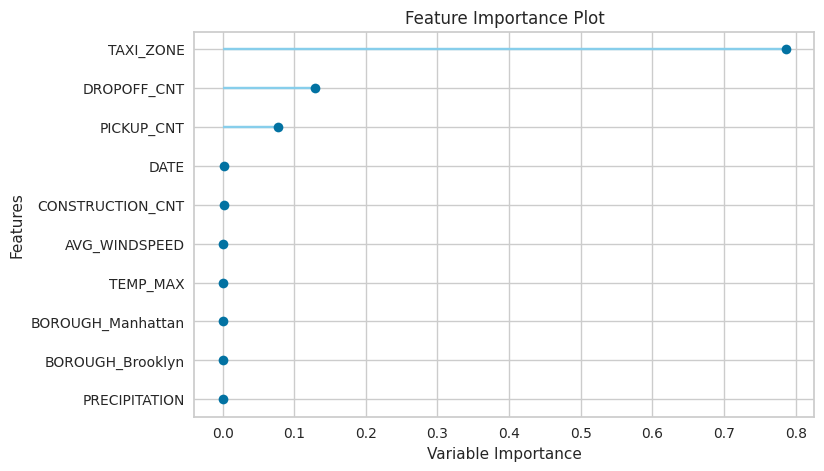

In [0]:
plot_model(regression_setup, plot="feature")

In [0]:
%restart_python

In [0]:
%pip install prophet


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


<Axes: xlabel='DATE'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

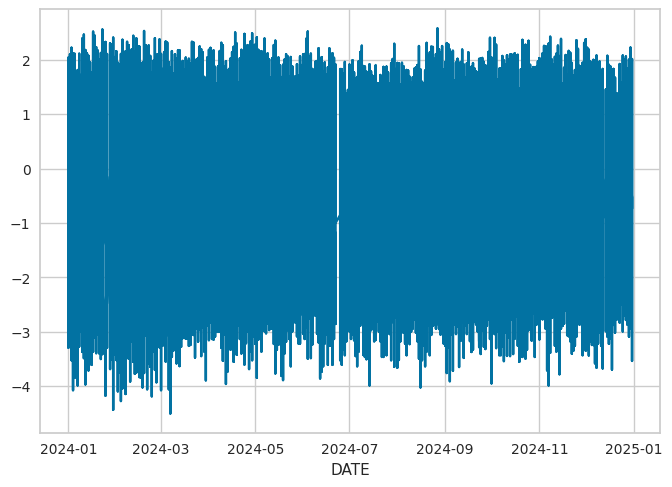

In [0]:
pdf.set_index("DATE")["Gap Ratio - Logarithm"].plot()

In [0]:
# model = Prophet()
# model.add_country_holidays("US")
# model.fit(prophet_df)
# future = model.make_future_dataframe(periods=30)
# forecast = model.predict(future)

In [0]:
# model.plot(forecast);

In [0]:
# model.plot_components(forecast);

In [0]:
# from prophet.plot import add_changepoints_to_plot
# fig = model.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [0]:
pdf = df.withColumn(
    "Gap Ratio - Logarithm",
    log(col("PICKUP_CNT") / col("DROPOFF_CNT"))
).toPandas()
pdf.dropna(inplace=True)

In [0]:
from prophet import Prophet
import pandas as pd
import numpy as np

gap_forecast_results = []
gap_models = {}
for zone in pdf['TAXI_ZONE'].unique():
    zone_df = pdf[
        pdf['TAXI_ZONE'] == zone
    ][
        ['DATE', 'Gap Ratio - Logarithm']
    ].rename(
        columns={
            'DATE': 'ds',
            'Gap Ratio - Logarithm': 'y'
        }
    ).sort_values('ds')

    if len(zone_df) >= 2:
        model = Prophet()
        model.add_country_holidays("US")
        model.fit(zone_df)
        future = model.make_future_dataframe(periods=30)

        forecast = model.predict(future)
        
        gap_models[zone] = model
        forecast['TAXI_ZONE'] = zone
        gap_forecast_results.append(
            forecast
        )
    else:
        print(f"Skipping zone {zone}: not enough data points.")

14:54:25 - cmdstanpy - INFO - Chain [1] start processing
14:54:25 - cmdstanpy - INFO - Chain [1] done processing
14:54:26 - cmdstanpy - INFO - Chain [1] start processing
14:54:26 - cmdstanpy - INFO - Chain [1] done processing
14:54:26 - cmdstanpy - INFO - Chain [1] start processing
14:54:26 - cmdstanpy - INFO - Chain [1] done processing
14:54:27 - cmdstanpy - INFO - Chain [1] start processing
14:54:27 - cmdstanpy - INFO - Chain [1] done processing
14:54:27 - cmdstanpy - INFO - Chain [1] start processing
14:54:27 - cmdstanpy - INFO - Chain [1] done processing
14:54:28 - cmdstanpy - INFO - Chain [1] start processing
14:54:28 - cmdstanpy - INFO - Chain [1] done processing
14:54:28 - cmdstanpy - INFO - Chain [1] start processing
14:54:28 - cmdstanpy - INFO - Chain [1] done processing
14:54:29 - cmdstanpy - INFO - Chain [1] start processing
14:54:29 - cmdstanpy - INFO - Chain [1] done processing
14:54:29 - cmdstanpy - INFO - Chain [1] start processing
14:54:29 - cmdstanpy - INFO - Chain [1]

Skipping zone 105: not enough data points.


14:56:39 - cmdstanpy - INFO - Chain [1] done processing
14:56:39 - cmdstanpy - INFO - Chain [1] start processing
14:56:40 - cmdstanpy - INFO - Chain [1] done processing
14:56:40 - cmdstanpy - INFO - Chain [1] start processing
14:56:40 - cmdstanpy - INFO - Chain [1] done processing
14:56:41 - cmdstanpy - INFO - Chain [1] start processing
14:56:41 - cmdstanpy - INFO - Chain [1] done processing
14:56:42 - cmdstanpy - INFO - Chain [1] start processing
14:56:48 - cmdstanpy - INFO - Chain [1] done processing
14:56:49 - cmdstanpy - INFO - Chain [1] start processing
14:56:49 - cmdstanpy - INFO - Chain [1] done processing
14:56:49 - cmdstanpy - INFO - Chain [1] start processing
14:56:49 - cmdstanpy - INFO - Chain [1] done processing


In [0]:
forecast_results[66]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Juneteenth National Independence Day,Juneteenth National Independence Day_lower,Juneteenth National Independence Day_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,Thanksgiving Day,Thanksgiving Day_lower,Thanksgiving Day_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,TAXI_ZONE
0,2024-01-01,1547.695916,763.666855,1329.525175,1547.695916,1547.695916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-320.404968,-320.404968,-320.404968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-509.939478,-509.939478,-509.939478,-320.404968,-320.404968,-320.404968,-189.534510,-189.534510,-189.534510,0.0,0.0,0.0,1037.756438,43
1,2024-01-02,1550.009191,1280.199944,1812.835364,1550.009191,1550.009191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.273889,-16.273889,-16.273889,0.000000,0.000000,0.000000,-16.273889,-16.273889,-16.273889,0.0,0.0,0.0,1533.735302,43
2,2024-01-03,1552.322466,1142.127256,1699.911870,1552.322466,1552.322466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-134.347639,-134.347639,-134.347639,0.000000,0.000000,0.000000,-134.347639,-134.347639,-134.347639,0.0,0.0,0.0,1417.974827,43
3,2024-01-04,1554.635741,1469.341734,1995.477415,1554.635741,1554.635741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.005444,172.005444,172.005444,0.000000,0.000000,0.000000,172.005444,172.005444,172.005444,0.0,0.0,0.0,1726.641185,43
4,2024-01-05,1556.949017,1471.831661,2002.184913,1556.949017,1556.949017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.583264,183.583264,183.583264,0.000000,0.000000,0.000000,183.583264,183.583264,183.583264,0.0,0.0,0.0,1740.532281,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2025-01-26,2126.224600,1588.486811,2155.054900,2116.166208,2136.454587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-273.243855,-273.243855,-273.243855,0.000000,0.000000,0.000000,-273.243855,-273.243855,-273.243855,0.0,0.0,0.0,1852.980745,43
386,2025-01-27,2129.167287,1674.925701,2218.169253,2118.345016,2140.334274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-189.534510,-189.534510,-189.534510,0.000000,0.000000,0.000000,-189.534510,-189.534510,-189.534510,0.0,0.0,0.0,1939.632777,43
387,2025-01-28,2132.109973,1843.245204,2384.670050,2120.465237,2144.270003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.273889,-16.273889,-16.273889,0.000000,0.000000,0.000000,-16.273889,-16.273889,-16.273889,0.0,0.0,0.0,2115.836084,43
388,2025-01-29,2

In [0]:
gap_models[43].plot(forecast_results[66]);


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File <command-8817103669643596>, line 1
----> 1 gap_models[43].plot(forecast_results[66])

KeyError: 43

In [0]:
models[263].plot_components(forecast_results[10]);


In [0]:
combined_forecast = pd.concat(forecast_results).loc[:,['ds', 'yhat', "TAXI_ZONE"]]
matrix = combined_forecast.pivot(index='ds', columns='TAXI_ZONE', values='yhat')


In [0]:
combined_forecast

In [0]:
combined_forecast.to_csv("gap_ratio_forecast_expanded.csv")

In [0]:
matrix.to_csv("gap_ratio_forecast_matrix.csv")


In [0]:
sfOptions = {
  "sfURL": f"{dbutils.secrets.get(scope='snowflake', key='sfAccount')}.snowflakecomputing.com",
  "sfUser": dbutils.secrets.get(scope="snowflake", key="sfUser"),
  "sfPassword": dbutils.secrets.get(scope="snowflake", key="sfPassword"),
  "sfDatabase": dbutils.secrets.get(scope="snowflake", key="sfDatabase"),
  "sfSchema": dbutils.secrets.get(scope="snowflake", key="sfSchema"),
  "sfWarehouse": dbutils.secrets.get(scope="snowflake", key="sfWarehouse")
}

In [0]:
# Write to Snowflake
spark.createDataFrame(pu_combined_forecast).write \
    .format("snowflake") \
    .options(**sfOptions) \
    .option("dbtable", "pu_forecast") \
    .mode("overwrite") \
    .save()


2025-08-21 13:52:21,016 6911 ERROR _handle_rpc_error GRPC Error received
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/pyspark/sql/connect/client/core.py", line 1723, in _execute_and_fetch_as_iterator
    for b in generator:
  File "<frozen _collections_abc>", line 330, in __next__
  File "/databricks/python/lib/python3.11/site-packages/pyspark/sql/connect/client/reattach.py", line 139, in send
    if not self._has_next():
           ^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/pyspark/sql/connect/client/reattach.py", line 200, in _has_next
    raise e
  File "/databricks/python/lib/python3.11/site-packages/pyspark/sql/connect/client/reattach.py", line 172, in _has_next
    self._current = self._call_iter(
                    ^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/pyspark/sql/connect/client/reattach.py", line 297, in _call_iter
    raise e
  File "/databricks/python/lib/python3.11

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-8883125579648122>, line 7
      1 # Write to Snowflake
      2 spark.createDataFrame(pu_combined_forecast).write \
      3     .format("snowflake") \
      4     .options(**sfOptions) \
      5     .option("dbtable", "pu_forecast") \
      6     .mode("overwrite") \
----> 7     .save()

File /databricks/python/lib/python3.11/site-packages/pyspark/sql/connect/readwriter.py:679, in DataFrameWriter.save(self, path, format, mode, partitionBy, **options)
    677     self.format(format)
    678 self._write.path = path
--> 679 _, _, ei = self._spark.client.execute_command(
    680     self._write.command(self._spark.client), self._write.observations
    681 )
    682 self._callback(ei)

File /databricks/python/lib/python3.11/site-packages/pyspark/sql/connect/client/core.py:1303, in SparkConnectClient.execute_command(self, command